# Neural Networks Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2007-01-01'
end = '2018-08-27'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700


In [3]:
dataset = dataset.reset_index()
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
1,2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2,2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
3,2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100
4,2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700


In [5]:
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,0)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,0)
dataset['Returns'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()

Data Exploration

In [6]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
2,2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300,1,1,1,0.032500
3,2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100,0,1,0,0.012107
4,2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700,0,0,0,0.000000
5,2014-01-09,4.20,4.23,4.05,4.09,4.09,30667600,0,0,1,-0.021531
6,2014-01-10,4.09,4.20,4.07,4.17,4.17,20840800,1,1,0,0.019560


In [7]:
dataset.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
1167,2018-08-21,19.980000,20.420000,19.860001,20.400000,20.400000,55629000,1,1,1,0.021021
1168,2018-08-22,20.280001,20.920000,20.209999,20.900000,20.900000,62002700,1,1,1,0.024510
1169,2018-08-23,21.190001,22.320000,21.139999,22.290001,22.290001,113444100,1,1,1,0.066507
1170,2018-08-24,22.910000,24.000000,22.670000,23.980000,23.980000,164328200,1,1,1,0.075819
1171,2018-08-27,24.940001,27.299999,24.629999,25.260000,25.260000,325058400,0,0,0,0.053378


In [8]:
dataset.dtypes

Date                 datetime64[ns]
Open                        float64
High                        float64
Low                         float64
Close                       float64
Adj Close                   float64
Volume                        int32
Increase_Decrease             int32
Buy_Sell_on_Open              int32
Buy_Sell                      int32
Returns                     float64
dtype: object

In [10]:
from sklearn.neural_network import MLPRegressor

In [39]:
X = np.array(dataset['Returns']).reshape(1, -1)
y = np.array(dataset['Adj Close']).reshape(1, -1)

In [40]:
clf = MLPRegressor(solver='lbfgs', alpha=1e-5,
                hidden_layer_sizes=(5, 2), random_state=1)

In [41]:
clf.fit(X, y)    

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [42]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.20, random_state = 0) 

In [43]:
y_pred = clf.predict(X_test)

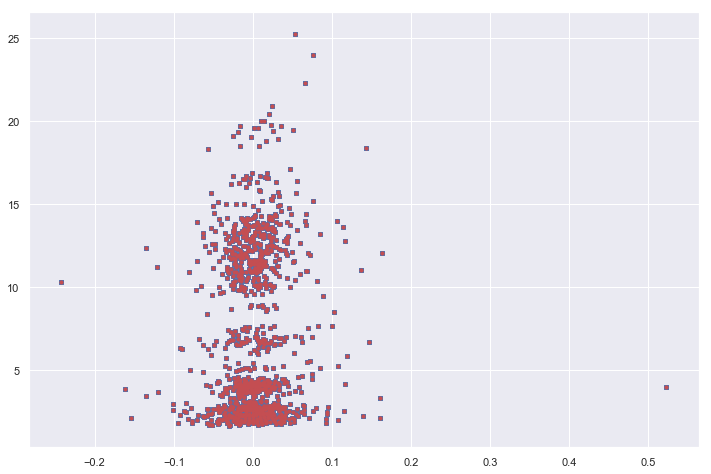

In [52]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(X, y, s=10, c='b', marker="s", label='real')
ax1.scatter(X_test, Y_test, s=10, c='r', marker="o", label='NN Prediction')
plt.show()

In [45]:
clf.coefs_

[array([[-0.01185904,  0.03148832, -0.07144261, -0.02825022, -0.05048491],
        [-0.05826212, -0.04483904, -0.02207214, -0.01475378,  0.00554761],
        [-0.01154855,  0.02647119, -0.04223907,  0.05403976, -0.06754478],
        ...,
        [ 0.02620193,  0.04208736, -0.00461847,  0.01820076,  0.05895923],
        [-0.00614949, -0.05216219,  0.00617878, -0.01000024,  0.03834675],
        [ 0.04254304, -0.04689909, -0.00886964, -0.03332546,  0.06498324]]),
 array([[-0.44611385, -0.03116298],
        [ 0.72234035,  0.33617285],
        [ 0.11688762,  0.69761271],
        [-0.41425564,  0.91998276],
        [-0.55578863,  0.62917536]]),
 array([[ 0.01215177, -0.03829643, -0.00235831, ...,  0.05126444,
          0.01010033,  0.05572331],
        [-0.03899801,  0.04206873, -0.06669257, ..., -0.03704846,
         -0.06108063,  0.01160819]])]

In [46]:
clf.coefs_[0]

array([[-0.01185904,  0.03148832, -0.07144261, -0.02825022, -0.05048491],
       [-0.05826212, -0.04483904, -0.02207214, -0.01475378,  0.00554761],
       [-0.01154855,  0.02647119, -0.04223907,  0.05403976, -0.06754478],
       ...,
       [ 0.02620193,  0.04208736, -0.00461847,  0.01820076,  0.05895923],
       [-0.00614949, -0.05216219,  0.00617878, -0.01000024,  0.03834675],
       [ 0.04254304, -0.04689909, -0.00886964, -0.03332546,  0.06498324]])

In [47]:
clf.intercepts_[0]

array([ 0.06243686, -0.00938274, -0.00985981,  0.035226  ,  0.01371668])

In [48]:
clf.score(X, y)

0.0